In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [3]:
num_epochs = 100
batch_size = 128
learning_rate = 0.0002
image_size = 32
image_channels = 3
latent_dim = 100

In [4]:
# Transformaciones para CIFAR-10
transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),  # Normalización RGB
])

# Dataset y DataLoader
cifar_dataset = datasets.CIFAR10(
    root='./data',
    train=True,
    transform=transform,
    download=True
)

data_loader = DataLoader(dataset=cifar_dataset, batch_size=batch_size, shuffle=True)


100%|██████████| 170M/170M [00:07<00:00, 24.2MB/s]


In [5]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.ConvTranspose2d(latent_dim, 512, 4, 1, 0, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(True),
            nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            nn.ConvTranspose2d(128, image_channels, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z)


In [6]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(image_channels, 128, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(256, 512, 4, 2, 1, bias=False),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(512, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)


In [7]:
generator = Generator().to(device)
discriminator = Discriminator().to(device)

criterion = nn.BCELoss()

optimizer_g = torch.optim.Adam(generator.parameters(), lr=learning_rate, betas=(0.5, 0.999))
optimizer_d = torch.optim.Adam(discriminator.parameters(), lr=learning_rate, betas=(0.5, 0.999))


Epoch [1/100]  Loss D: 0.3347  Loss G: 4.0410
Epoch [2/100]  Loss D: 0.6157  Loss G: 3.4639
Epoch [3/100]  Loss D: 0.6021  Loss G: 2.5391
Epoch [4/100]  Loss D: 0.5148  Loss G: 2.2890
Epoch [5/100]  Loss D: 0.5823  Loss G: 3.3436
Epoch [6/100]  Loss D: 0.4615  Loss G: 4.1720
Epoch [7/100]  Loss D: 0.4083  Loss G: 3.0438
Epoch [8/100]  Loss D: 0.0509  Loss G: 4.2099
Epoch [9/100]  Loss D: 0.4119  Loss G: 6.6692
Epoch [10/100]  Loss D: 0.3126  Loss G: 3.2323


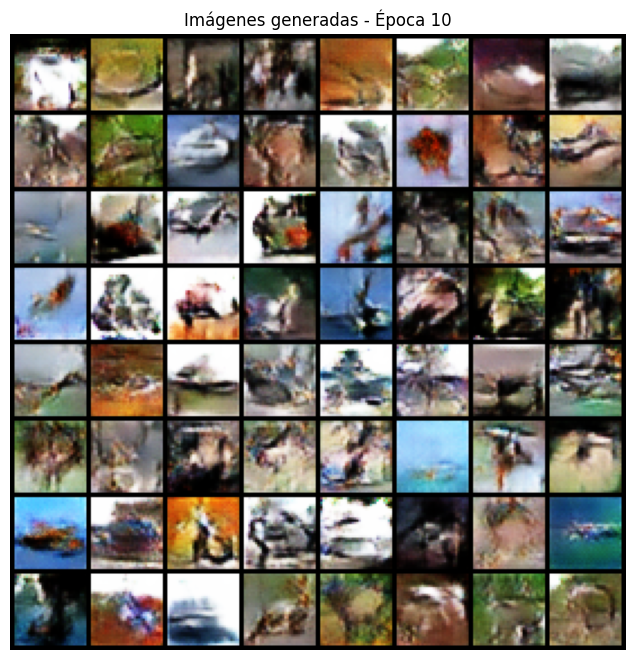

Epoch [11/100]  Loss D: 0.1003  Loss G: 4.2873
Epoch [12/100]  Loss D: 0.1251  Loss G: 4.0640
Epoch [13/100]  Loss D: 0.2721  Loss G: 2.6091
Epoch [14/100]  Loss D: 0.7030  Loss G: 4.9568
Epoch [15/100]  Loss D: 0.1385  Loss G: 4.0904
Epoch [16/100]  Loss D: 0.1274  Loss G: 3.7602
Epoch [17/100]  Loss D: 0.2870  Loss G: 3.6867
Epoch [18/100]  Loss D: 0.1344  Loss G: 4.0310
Epoch [19/100]  Loss D: 0.1299  Loss G: 3.9007
Epoch [20/100]  Loss D: 0.3403  Loss G: 2.9235


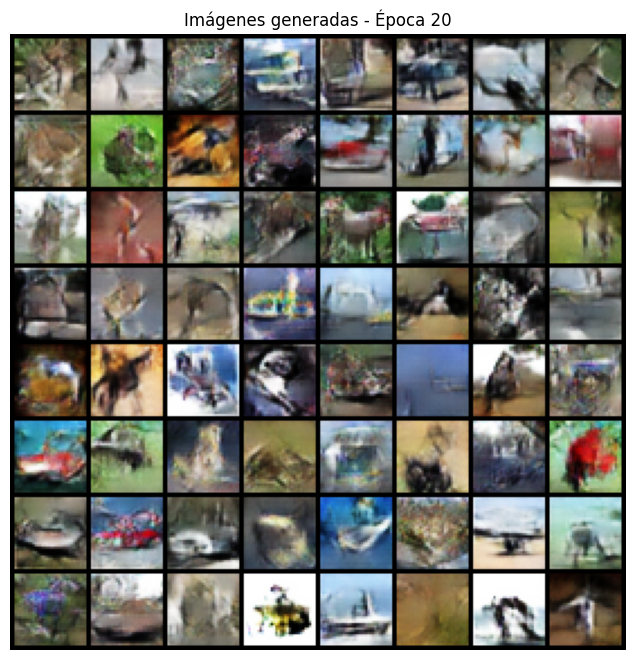

Epoch [21/100]  Loss D: 0.1416  Loss G: 3.6755
Epoch [22/100]  Loss D: 0.0834  Loss G: 4.7608
Epoch [23/100]  Loss D: 0.4864  Loss G: 6.0184
Epoch [24/100]  Loss D: 0.5096  Loss G: 1.9393
Epoch [25/100]  Loss D: 0.4831  Loss G: 3.0056
Epoch [26/100]  Loss D: 0.2439  Loss G: 3.6469
Epoch [27/100]  Loss D: 0.1739  Loss G: 3.6412
Epoch [28/100]  Loss D: 0.1324  Loss G: 3.6089
Epoch [29/100]  Loss D: 0.1902  Loss G: 3.2482
Epoch [30/100]  Loss D: 0.1264  Loss G: 4.3023


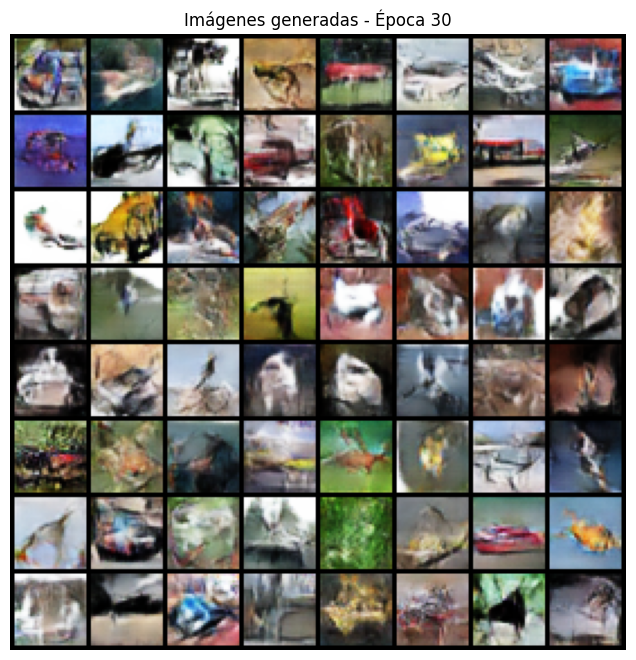

Epoch [31/100]  Loss D: 0.0943  Loss G: 4.4053
Epoch [32/100]  Loss D: 0.1443  Loss G: 3.8504
Epoch [33/100]  Loss D: 0.1879  Loss G: 3.7978
Epoch [34/100]  Loss D: 0.1384  Loss G: 4.4252
Epoch [35/100]  Loss D: 0.0947  Loss G: 4.1230
Epoch [36/100]  Loss D: 0.2209  Loss G: 2.6176
Epoch [37/100]  Loss D: 1.0296  Loss G: 7.9587
Epoch [38/100]  Loss D: 0.2225  Loss G: 5.2696
Epoch [39/100]  Loss D: 0.1400  Loss G: 5.0818
Epoch [40/100]  Loss D: 0.1562  Loss G: 3.2555


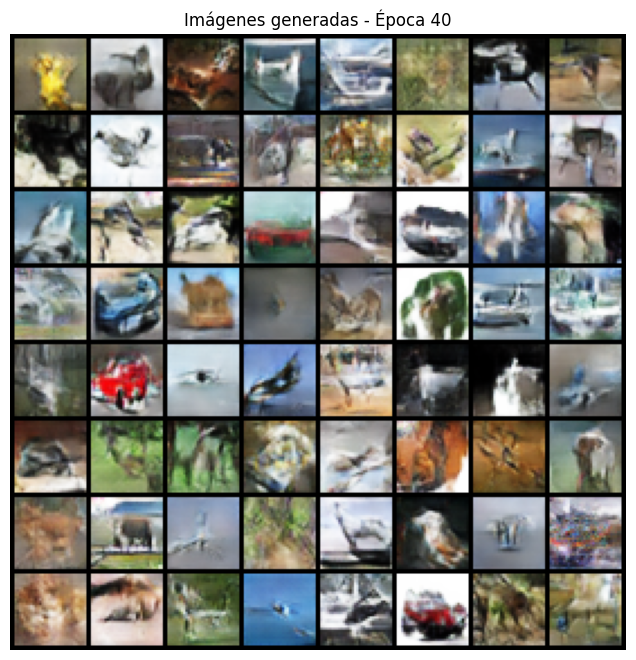

Epoch [41/100]  Loss D: 0.1998  Loss G: 3.4113
Epoch [42/100]  Loss D: 0.1700  Loss G: 4.4298
Epoch [43/100]  Loss D: 0.2392  Loss G: 3.9083
Epoch [44/100]  Loss D: 0.0823  Loss G: 4.2708
Epoch [45/100]  Loss D: 0.1574  Loss G: 4.6266
Epoch [46/100]  Loss D: 0.0888  Loss G: 3.7081
Epoch [47/100]  Loss D: 0.3058  Loss G: 4.5995
Epoch [48/100]  Loss D: 0.5288  Loss G: 5.1492
Epoch [49/100]  Loss D: 0.2386  Loss G: 4.5683
Epoch [50/100]  Loss D: 0.2367  Loss G: 4.7924


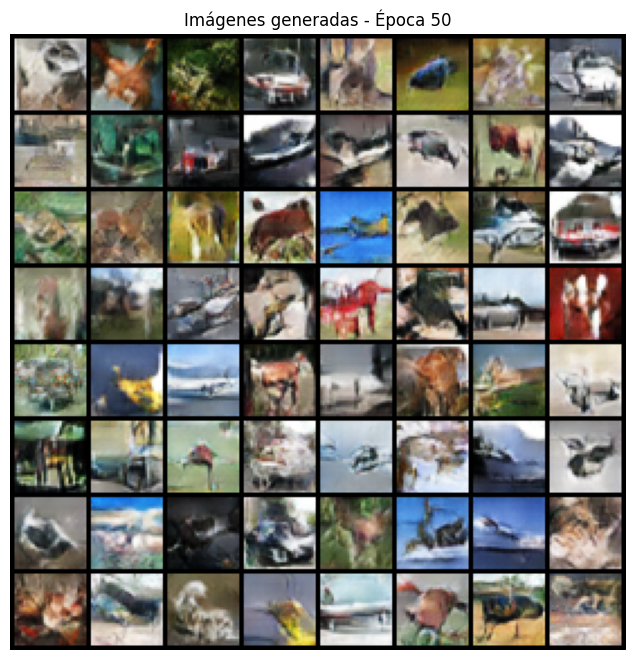

Epoch [51/100]  Loss D: 0.4107  Loss G: 3.5230
Epoch [52/100]  Loss D: 0.1519  Loss G: 4.0139
Epoch [53/100]  Loss D: 0.0995  Loss G: 3.7712
Epoch [54/100]  Loss D: 0.1599  Loss G: 3.8484
Epoch [55/100]  Loss D: 0.2842  Loss G: 3.8694
Epoch [56/100]  Loss D: 0.8024  Loss G: 6.5617
Epoch [57/100]  Loss D: 0.1181  Loss G: 5.0080
Epoch [58/100]  Loss D: 0.4956  Loss G: 4.5024
Epoch [59/100]  Loss D: 0.1036  Loss G: 4.3686
Epoch [60/100]  Loss D: 0.1661  Loss G: 3.8289


Epoch [61/100]  Loss D: 0.1808  Loss G: 3.4980
Epoch [62/100]  Loss D: 0.1991  Loss G: 3.5294
Epoch [63/100]  Loss D: 0.2033  Loss G: 4.9970
Epoch [64/100]  Loss D: 0.2045  Loss G: 3.9267
Epoch [65/100]  Loss D: 0.1248  Loss G: 3.5863
Epoch [66/100]  Loss D: 0.2031  Loss G: 3.0828
Epoch [67/100]  Loss D: 0.2782  Loss G: 3.4529
Epoch [68/100]  Loss D: 0.1367  Loss G: 3.8033
Epoch [69/100]  Loss D: 0.2011  Loss G: 3.7999
Epoch [70/100]  Loss D: 0.0681  Loss G: 4.5924


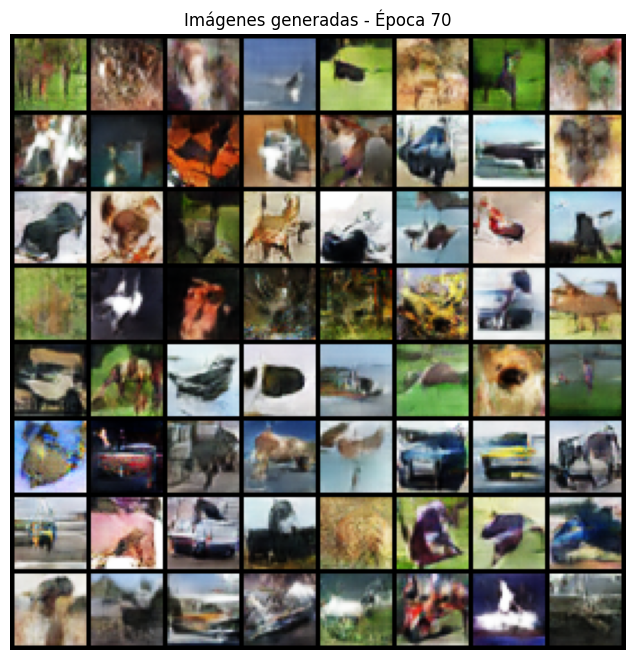

Epoch [71/100]  Loss D: 0.8277  Loss G: 2.7876
Epoch [72/100]  Loss D: 0.2850  Loss G: 3.4230
Epoch [73/100]  Loss D: 0.1609  Loss G: 5.0459
Epoch [74/100]  Loss D: 0.2853  Loss G: 4.6205
Epoch [75/100]  Loss D: 0.3071  Loss G: 3.9458
Epoch [76/100]  Loss D: 0.1557  Loss G: 3.7355
Epoch [77/100]  Loss D: 0.1367  Loss G: 3.7987
Epoch [78/100]  Loss D: 0.1203  Loss G: 5.7172
Epoch [79/100]  Loss D: 0.2527  Loss G: 4.7189
Epoch [80/100]  Loss D: 0.2266  Loss G: 3.3993


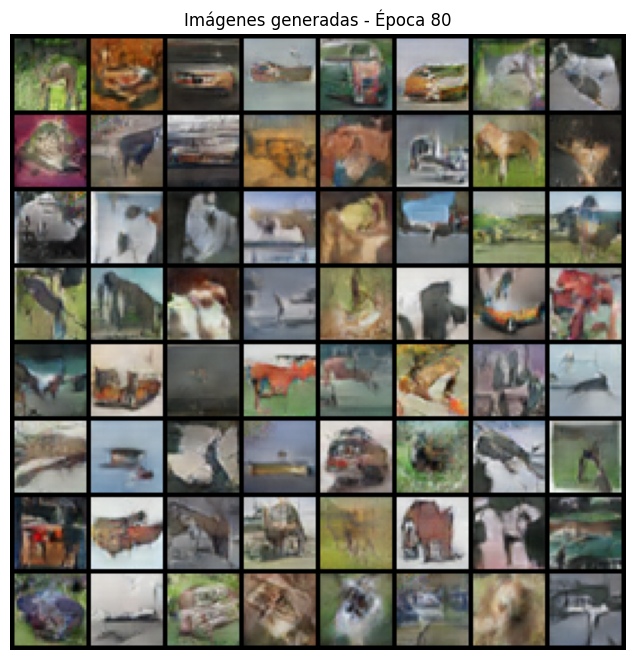

Epoch [81/100]  Loss D: 0.1979  Loss G: 4.4668
Epoch [82/100]  Loss D: 0.3140  Loss G: 3.5395
Epoch [83/100]  Loss D: 0.1381  Loss G: 4.1431
Epoch [84/100]  Loss D: 0.1561  Loss G: 4.7772
Epoch [85/100]  Loss D: 0.6220  Loss G: 3.5402
Epoch [86/100]  Loss D: 2.6439  Loss G: 1.3980
Epoch [87/100]  Loss D: 0.3917  Loss G: 5.0256
Epoch [88/100]  Loss D: 0.2493  Loss G: 5.1365
Epoch [89/100]  Loss D: 0.2071  Loss G: 3.9230
Epoch [90/100]  Loss D: 0.1812  Loss G: 5.7780


Epoch [91/100]  Loss D: 0.4743  Loss G: 7.1152
Epoch [92/100]  Loss D: 0.4249  Loss G: 3.0833
Epoch [93/100]  Loss D: 0.0997  Loss G: 5.2436
Epoch [94/100]  Loss D: 0.6091  Loss G: 2.3403
Epoch [95/100]  Loss D: 0.0739  Loss G: 4.8644
Epoch [96/100]  Loss D: 0.1949  Loss G: 4.6131
Epoch [97/100]  Loss D: 0.1600  Loss G: 3.9321
Epoch [98/100]  Loss D: 0.2426  Loss G: 3.9799
Epoch [99/100]  Loss D: 0.0629  Loss G: 5.3846
Epoch [100/100]  Loss D: 0.3914  Loss G: 5.1151


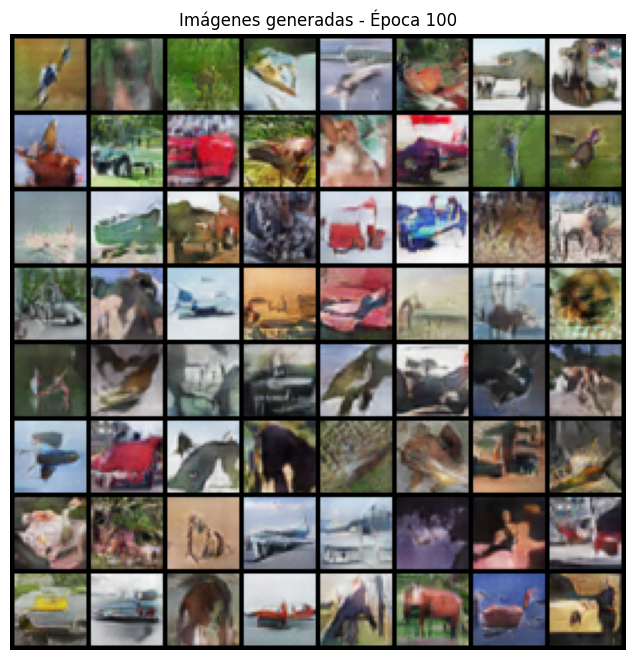

In [8]:
for epoch in range(num_epochs):
    for i, (real_images, _) in enumerate(data_loader):
        real_images = real_images.to(device)
        batch_size_curr = real_images.size(0)

        # Entrenar discriminador
        optimizer_d.zero_grad()
        labels_real = torch.ones(batch_size_curr, 1, device=device)
        labels_fake = torch.zeros(batch_size_curr, 1, device=device)

        outputs_real = discriminator(real_images).view(-1, 1)
        loss_real = criterion(outputs_real, labels_real)

        noise = torch.randn(batch_size_curr, latent_dim, 1, 1, device=device)
        fake_images = generator(noise)
        outputs_fake = discriminator(fake_images.detach()).view(-1, 1)
        loss_fake = criterion(outputs_fake, labels_fake)

        loss_d = loss_real + loss_fake
        loss_d.backward()
        optimizer_d.step()

        # Entrenar generador
        optimizer_g.zero_grad()
        outputs_fake_for_g = discriminator(fake_images).view(-1, 1)
        loss_g = criterion(outputs_fake_for_g, labels_real)
        loss_g.backward()
        optimizer_g.step()

    # Mostrar pérdidas
    print(f"Epoch [{epoch+1}/{num_epochs}]  Loss D: {loss_d.item():.4f}  Loss G: {loss_g.item():.4f}")
    if (epoch + 1) % 10 == 0:
        with torch.no_grad():
            noise = torch.randn(64, latent_dim, 1, 1, device=device)
            fake_images = generator(noise).detach().cpu()
            grid = torchvision.utils.make_grid(fake_images, padding=2, normalize=True)
            plt.figure(figsize=(8,8))
            plt.axis("off")
            plt.title(f"Imágenes generadas - Época {epoch+1}")
            plt.imshow(np.transpose(grid, (1, 2, 0)))
            plt.show()


In [9]:
torch.save(generator.state_dict(), "generator_cifar10.pth")
torch.save(discriminator.state_dict(), "discriminator_cifar10.pth")


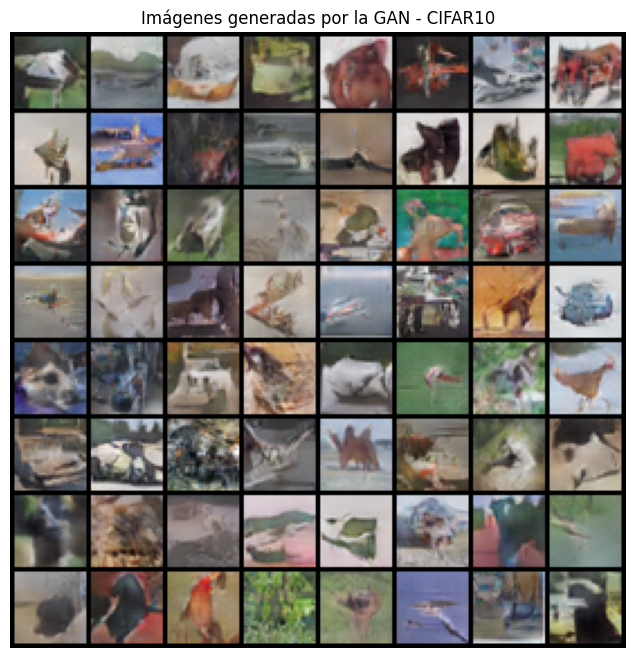

In [10]:
with torch.no_grad():
    noise = torch.randn(64, latent_dim, 1, 1, device=device)
    fake_images = generator(noise).detach().cpu()
    grid = torchvision.utils.make_grid(fake_images, padding=2, normalize=True)
    plt.figure(figsize=(8,8))
    plt.axis("off")
    plt.title("Imágenes generadas por la GAN - CIFAR10")
    plt.imshow(np.transpose(grid, (1, 2, 0)))
    plt.show()


In [11]:
# Mostrar ejemplos reales del dataset CIFAR-10
real_batch = next(iter(data_loader))
real_images, _ = real_batch

plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Ejemplos reales del dataset CIFAR-10")
real_grid = torchvision.utils.make_grid(real_images[:64], padding=2, normalize=True)
plt.imshow(np.transpose(real_grid, (1, 2, 0)))
plt.show()
